In [1]:
from github import Github
import git
# First create a Github instance:

# using an access token
g = Github("")


In [2]:
import os
from pathlib import Path

In [3]:
!pip freeze

anyio==3.1.0
argon2-cffi==20.1.0
async-generator==1.10
attrs==21.2.0
Babel==2.9.1
backcall==0.2.0
bertopic==0.8.1
bleach==3.3.0
bpemb==0.3.3
certifi==2021.5.30
cffi==1.14.5
chardet==4.0.0
click==8.0.1
cloudpickle==1.6.0
cycler==0.10.0
Cython==0.29.23
decorator==4.4.2
defusedxml==0.7.1
Deprecated==1.2.12
entrypoints==0.3
filelock==3.0.12
flair==0.8.0.post1
ftfy==6.0.3
future==0.18.2
gdown==3.12.2
gensim==3.8.3
gitdb==4.0.7
GitPython==3.1.17
hdbscan==0.8.27
huggingface-hub==0.0.8
hyperopt==0.2.5
idna==2.10
importlib-metadata==3.10.1
install==1.3.4
ipykernel==5.5.5
ipython==7.24.1
ipython-genutils==0.2.0
ipywidgets==7.6.3
Janome==0.4.1
jedi==0.18.0
Jinja2==3.0.1
joblib==1.0.1
json5==0.9.5
jsonschema==3.2.0
jupyter-client==6.1.12
jupyter-core==4.7.1
jupyter-server==1.8.0
jupyterlab==3.0.16
jupyterlab-pygments==0.1.2
jupyterlab-server==2.6.0
jupyterlab-widgets==1.0.0
kiwisolver==1.3.1
konoha==4.6.5
langdetect==1.0.9
llvmlite==0.36.0
lxml==4.6.3
MarkupSafe==2.0.1
matplotlib==3.4.2
matplotlib

In [4]:
username = "godemodegame"

In [5]:
user_path = f"./codes/{username}"

In [6]:
Path(user_path).mkdir(parents=True, exist_ok=True)

In [7]:
user = g.get_user(username)

In [8]:
for repo in user.get_repos(direction="desc")[:10]:
    print(repo.name)
    try:
        git.Git(user_path).clone(repo.git_url)
    except:
        pass

triggerBot
testExercise
SteamClient
SkyengTest
SberOnline
RostelecomAuto
randomMeme
PartyFinder
Nibless
matlab


In [9]:
file_ext = ["*.py", "*.swift", "*.cpp", "*.c", "*.h", "*.cs", "*.js", "*.jsx", "*.ts", "*.tsx"]

In [10]:
import glob

In [11]:
file_to_analysis= []

In [12]:
for ext in file_ext:
    file_to_analysis.extend(
        glob.glob(f"{user_path}/**/*{ext}",recursive=True)
    )

In [13]:
files = []

In [14]:
for file in file_to_analysis:
    with open(file, 'r') as reader:
        files.append(reader.read())

In [15]:
len(files)

525

In [16]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("mrm8488/codebert-base-finetuned-stackoverflow-ner")

model = AutoModelForTokenClassification.from_pretrained("mrm8488/codebert-base-finetuned-stackoverflow-ner")

In [17]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

In [18]:
from tqdm import tqdm

In [19]:
user_lib = []

In [20]:
for item in tqdm(files):
    ner_results = nlp(item.lower())
    for ner in ner_results:
        if ner['entity_group'] == 'Library':
            user_lib.append(ner['word'])

100%|██████████| 525/525 [01:24<00:00,  6.21it/s]


In [35]:
update_lib = []
for item in user_lib:
    lib = [x for x in item.split(' ') if len(x)>2]
    if lib:
        update_lib.append(lib[-1])

In [36]:
my_dict = {i:update_lib.count(i) for i in update_lib}

In [50]:
sum_ = 0
for liba in sorted(my_dict, key=lambda x: x[1], reverse=True)[:10]:
    sum_+=my_dict[liba]

In [66]:
lib_record = []
for liba in sorted(my_dict, key=lambda x: x[1], reverse=True)[:10]:
    lib_record.append({"name":liba, "value": int((my_dict[liba]/sum_)*100)})

In [67]:
lib_record

[{'name': 'swift', 'value': 66},
 {'name': 'swiftui', 'value': 10},
 {'name': 'avkit', 'value': 1},
 {'name': 'luent', 'value': 1},
 {'name': 'sqlite3', 'value': 2},
 {'name': 'sqlite', 'value': 2},
 {'name': 'api', 'value': 1},
 {'name': 'spritekit', 'value': 7},
 {'name': 'apor', 'value': 2},
 {'name': 'app', 'value': 2}]

In [68]:
sorted(enumerate(my_dict), key=lambda x: x[1], reverse=True)[:10]

[(22, 'xctest'),
 (23, 'xct'),
 (15, 'widgetkit'),
 (5, 'webkit'),
 (33, 'vapor'),
 (3, 'uikit'),
 (21, 'uik'),
 (41, 'uge'),
 (20, 'tools'),
 (8, 'swiftui')]

In [69]:
langs = []
for file in file_to_analysis:
    langs.append(file.split('.')[-1])

In [70]:
langs_dict = {i:langs.count(i)/len(file_to_analysis) for i in langs}

In [75]:
record_lang = []
for language in sorted(langs_dict, key=lambda x: x, reverse=True)[:10]:
    record_lang.append({'name':language, 'value': int(langs_dict[language]*100)})

In [76]:
record_lang

[{'name': 'swift', 'value': 59},
 {'name': 'py', 'value': 0},
 {'name': 'h', 'value': 39}]

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

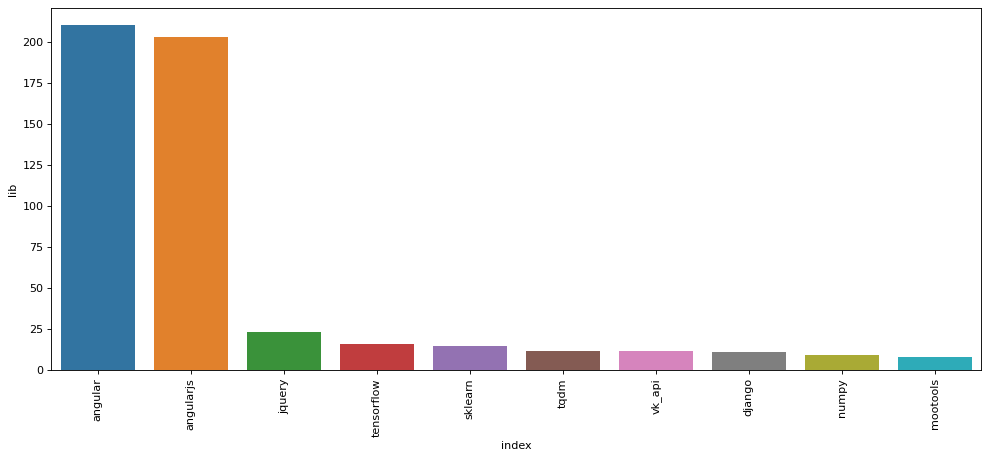

In [26]:
plt.figure(figsize=(15, 6), dpi=80)
sns.barplot(data=top_languages[:10], x='index', y='lib');
plt.xticks(rotation=90);